In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

In [3]:
# read parquet data
fhv_df_22_01 = pd.read_parquet('../data/raw/fhv_tripdata_2022-01.parquet')
fhv_df_22_01.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2022-01-01 00:31:00,2022-01-01 01:05:00,NaN,NaN,None,B00009
1,B00009,2022-01-01 00:37:00,2022-01-01 01:05:00,NaN,NaN,None,B00009
2,B00037,2022-01-01 00:56:37,2022-01-01 01:06:11,NaN,85.0,None,B00037
3,B00037,2022-01-01 00:19:54,2022-01-01 00:30:47,NaN,85.0,None,B00037
4,B00037,2022-01-01 00:41:49,2022-01-01 00:52:16,NaN,188.0,None,B00037


In [4]:
fhvhv_df_22_01 = pd.read_parquet('../data/raw/fhvhv_tripdata_2022-01.parquet')
fhvhv_df_22_01.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2022-01-01 00:05:31,2022-01-01 00:05:40,2022-01-01 00:07:24,2022-01-01 00:18:28,170,161,1.18,664,24.90,0.0,0.75,2.21,2.75,0.0,0.0,23.03,N,N,,N,N
1,HV0003,B03404,B03404,2022-01-01 00:19:27,2022-01-01 00:22:08,2022-01-01 00:22:32,2022-01-01 00:30:12,237,161,0.82,460,11.97,0.0,0.36,1.06,2.75,0.0,0.0,12.32,N,N,,N,N
2,HV0003,B03404,B03404,2022-01-01 00:43:53,2022-01-01 00:57:37,2022-01-01 00:57:37,2022-01-01 01:07:32,237,161,1.18,595,29.82,0.0,0.89,2.65,2.75,0.0,0.0,23.30,N,N,,N,N
3,HV0003,B03404,B03404,2022-01-01 00:15:36,2022-01-01 00:17:08,2022-01-01 00:18:02,2022-01-01 00:23:05,262,229,1.65,303,7.91,0.0,0.24,0.70,2.75,0.0,0.0,6.30,N,N,,N,N
4,HV0003,B03404,B03404,2022-01-01 00:25:45,2022-01-01 00:26:01,2022-01-01 00:28:01,2022-01-01 00:35:42,229,141,1.65,461,9.44,0.0,0.28,0.84,2.75,0.0,0.0,7.44,N,N,,N,N


In [5]:
fhvhv_df_22_01.shape

(14751591, 24)

In [6]:
fhvhv_df_22_01.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [7]:
fhvhv_df_22_01.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,14751591,10829934,14751591,14751591,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07,1.475159e+07
mean,2022-01-17 00:44:22.792681,2022-01-17 01:20:23.351319,2022-01-17 00:48:44.906158,2022-01-17 01:05:39.393143,1.378918e+02,1.413687e+02,4.632833e+00,1.020126e+03,1.965113e+01,8.979449e-01,6.217636e-01,1.707564e+00,1.079914e+00,1.470887e-01,8.065149e-01,1.563843e+01
min,2021-12-31 22:55:05,2021-12-31 23:28:59,2022-01-01 00:00:00,2022-01-01 00:02:49,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.486100e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.826400e+02
25%,2022-01-09 12:33:39,2022-01-09 12:48:22,2022-01-09 12:37:09,2022-01-09 12:52:39,7.400000e+01,7.500000e+01,1.520000e+00,5.490000e+02,9.860000e+00,0.000000e+00,3.000000e-01,8.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,7.680000e+00
50%,2022-01-17 00:05:29,2022-01-17 00:09:10,2022-01-17 00:12:20,2022-01-17 00:27:14,1.390000e+02,1.410000e+02,2.810000e+00,8.510000e+02,1.541000e+01,0.000000e+00,4.700000e-01,1.340000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.203000e+01
75%,2022-01-24 09:31:53,2022-01-24 10:54:08.750000,2022-01-24 09:35:22,2022-01-24 09:53:59,2.110000e+02,2.160000e+02,5.710000e+00,1.303000e+03,2.400000e+01,0.000000e+00,7.400000e-01,2.110000e+00,2.750000e+00,0.000000e+00,0.000000e+00,1.941000e+01
max,2022-02-01 00:10:03,2022-01-31 23:59:54,2022-01-31 23:59:59,2022-02-01 07:21:13,2.650000e+02,2.650000e+02,4.407100e+02,1.479180e+05,4.995960e+03,5.045800e+02,1.645600e+02,4.868300e+02,1.100000e+01,6.400000e+00,2.031600e+02,4.643190e+03
std,NaN,NaN,NaN,NaN,7.570652e+01,7.805336e+01,5.312836e+00,6.874427e+02,1.546124e+01,3.414747e+00,5.278451e-01,1.321465e+00,1.351230e+00,5.920917e-01,2.448188e+00,1.231398e+01


In [8]:
def get_ts_data_fhvhv(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    # df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
    df['pickup_date'] = df['pickup_datetime'].dt.date
    # df['pickup_time'] = df['pickup_datetime'].dt.time
    # df['dropoff_date'] = df['dropoff_datetime'].dt.date
    # df['dropoff_time'] = df['dropoff_datetime'].dt.time
    # df['pickup_hour'] = df['pickup_datetime'].dt.hour
    # df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
    # df['pickup_day'] = df['pickup_datetime'].dt.day
    # df['dropoff_day'] = df['dropoff_datetime'].dt.day
    # df['pickup_month'] = df['pickup_datetime'].dt.month
    # df['dropoff_month'] = df['dropoff_datetime'].dt.month
    # df['pickup_year'] = df['pickup_datetime'].dt.year
    # df['dropoff_year'] = df['dropoff_datetime'].dt.year
    # df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
    # df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday
    # df['pickup_weekday_name'] = df['pickup_datetime'].dt.day_name()
    # df['dropoff_weekday_name'] = df['dropoff_datetime'].dt.day_name()
    # df['pickup_week'] = df['pickup_datetime'].dt.week
    # df['dropoff_week'] = df['dropoff_datetime'].dt.week
    # df['pickup_quarter'] = df['pickup_datetime'].dt.quarter
    # df['dropoff_quarter'] = df['dropoff_datetime'].dt.quarter
    df = df.groupby(['pickup_date', 'PULocationID'])['hvfhs_license_num'].count().reset_index()

    #rename column 'hvfhs_license_num' to 'count'
    df.rename(columns = {'hvfhs_license_num':'count'}, inplace = True)

    return df

In [9]:
res = get_ts_data_fhvhv(fhvhv_df_22_01)
res.head()

,pickup_date,PULocationID,count
0,2022-01-01,2,2
1,2022-01-01,3,915
2,2022-01-01,4,2034
3,2022-01-01,5,126
4,2022-01-01,6,214


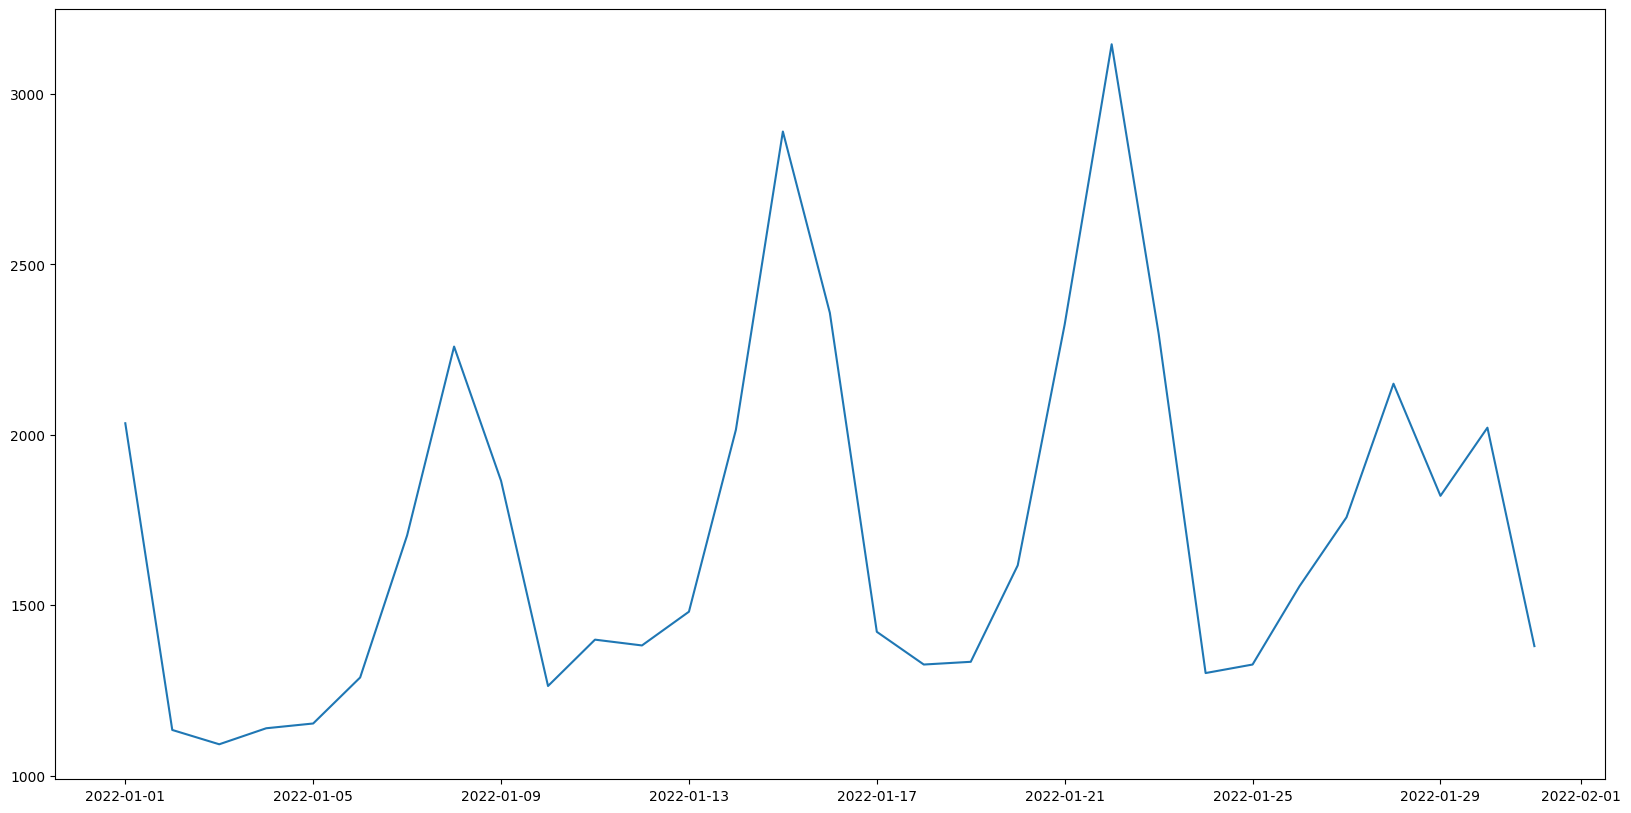

In [10]:
#plotting daily counts
plt.figure(figsize=(20,10))
plt.plot(res[res['PULocationID']==4]['pickup_date'], res[res['PULocationID']==4]['count'])


In [11]:
import os

files = [f for f in os.listdir("../data/raw/") if f.__contains__('fhvhv_tripdata')]
files

['fhvhv_tripdata_2023-09.parquet',
 'fhvhv_tripdata_2022-06.parquet',
 'fhvhv_tripdata_2022-07.parquet',
 'fhvhv_tripdata_2023-01.parquet',
 'fhvhv_tripdata_2023-08.parquet',
 'fhvhv_tripdata_2022-05.parquet',
 'fhvhv_tripdata_2023-03.parquet',
 'fhvhv_tripdata_2022-04.parquet',
 'fhvhv_tripdata_2023-02.parquet',
 'fhvhv_tripdata_2023-07.parquet',
 'fhvhv_tripdata_2022-11.parquet',
 'fhvhv_tripdata_2022-01.parquet',
 'fhvhv_tripdata_2022-08.parquet',
 'fhvhv_tripdata_2022-09.parquet',
 'fhvhv_tripdata_2023-06.parquet',
 'fhvhv_tripdata_2022-10.parquet',
 'fhvhv_tripdata_2023-04.parquet',
 'fhvhv_tripdata_2022-12.parquet',
 'fhvhv_tripdata_2022-02.parquet',
 'fhvhv_tripdata_2023-05.parquet',
 'fhvhv_tripdata_2022-03.parquet']

In [12]:
res = pd.DataFrame()

for file in files:
    print(file)
    df_month = pd.read_parquet('../data/raw/'+file)
    df_month = get_ts_data_fhvhv(df_month)
    res = pd.concat([res, df_month], axis=0)
    print(df_month.shape)


res.shape

fhvhv_tripdata_2023-09.parquet
(7763, 3)
fhvhv_tripdata_2022-06.parquet
(7763, 3)
fhvhv_tripdata_2022-07.parquet
(8021, 3)
fhvhv_tripdata_2023-01.parquet
(8024, 3)
fhvhv_tripdata_2023-08.parquet
(8015, 3)
fhvhv_tripdata_2022-05.parquet
(8033, 3)
fhvhv_tripdata_2023-03.parquet
(8019, 3)
fhvhv_tripdata_2022-04.parquet
(7775, 3)
fhvhv_tripdata_2023-02.parquet
(7249, 3)
fhvhv_tripdata_2023-07.parquet
(8033, 3)
fhvhv_tripdata_2022-11.parquet
(7759, 3)
fhvhv_tripdata_2022-01.parquet
(7997, 3)
fhvhv_tripdata_2022-08.parquet
(8019, 3)
fhvhv_tripdata_2022-09.parquet
(7763, 3)
fhvhv_tripdata_2023-06.parquet
(7770, 3)
fhvhv_tripdata_2022-10.parquet
(8021, 3)
fhvhv_tripdata_2023-04.parquet
(7773, 3)
fhvhv_tripdata_2022-12.parquet
(8020, 3)
fhvhv_tripdata_2022-02.parquet
(7235, 3)
fhvhv_tripdata_2023-05.parquet
(8018, 3)
fhvhv_tripdata_2022-03.parquet
(8016, 3)


(165086, 3)

In [13]:
import gc
gc.collect()

21

In [14]:
res.sort_values(by=['pickup_date', 'PULocationID'], inplace=True)

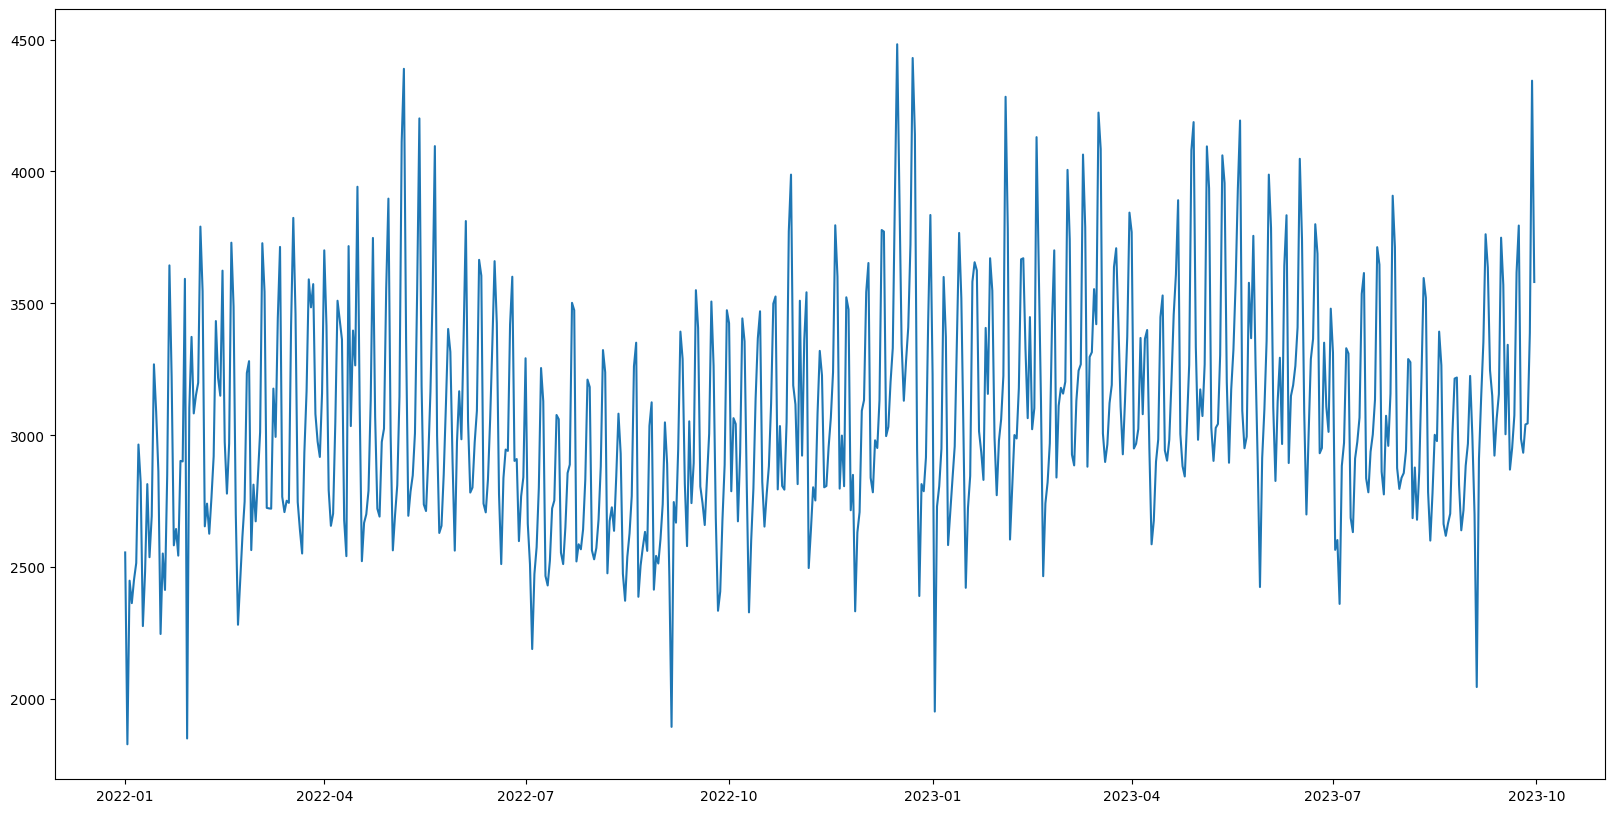

In [15]:
plt.figure(figsize=(20,10))
plt.plot(res[res['PULocationID']==14]['pickup_date'], res[res['PULocationID']==14]['count'])

In [16]:
# filter out NAN locations
res = res[res['PULocationID'].notna()]

In [17]:
# turn irregular time series into regular time series
start_date = res['pickup_date'].min()
end_date = res['pickup_date'].max()

date_range = pd.date_range(start_date, end_date)



result = res.set_index('pickup_date').groupby('PULocationID')['count'].apply(lambda x: x.reindex(date_range,fill_value = 0)).reset_index()
result.columns = ['PULocationID', 'pickup_date', 'count']

result.to_csv('../data/processed/fhvhv_daily_counts.csv', index=False)

In [18]:
result_with_na = res.set_index('pickup_date').groupby('PULocationID')['count'].apply(lambda x: x.reindex(date_range)).reset_index()
result_with_na.columns = ['PULocationID', 'pickup_date', 'count']

result_with_na.to_csv('../data/processed/fhvhv_daily_counts_with_NA.csv', index=False)

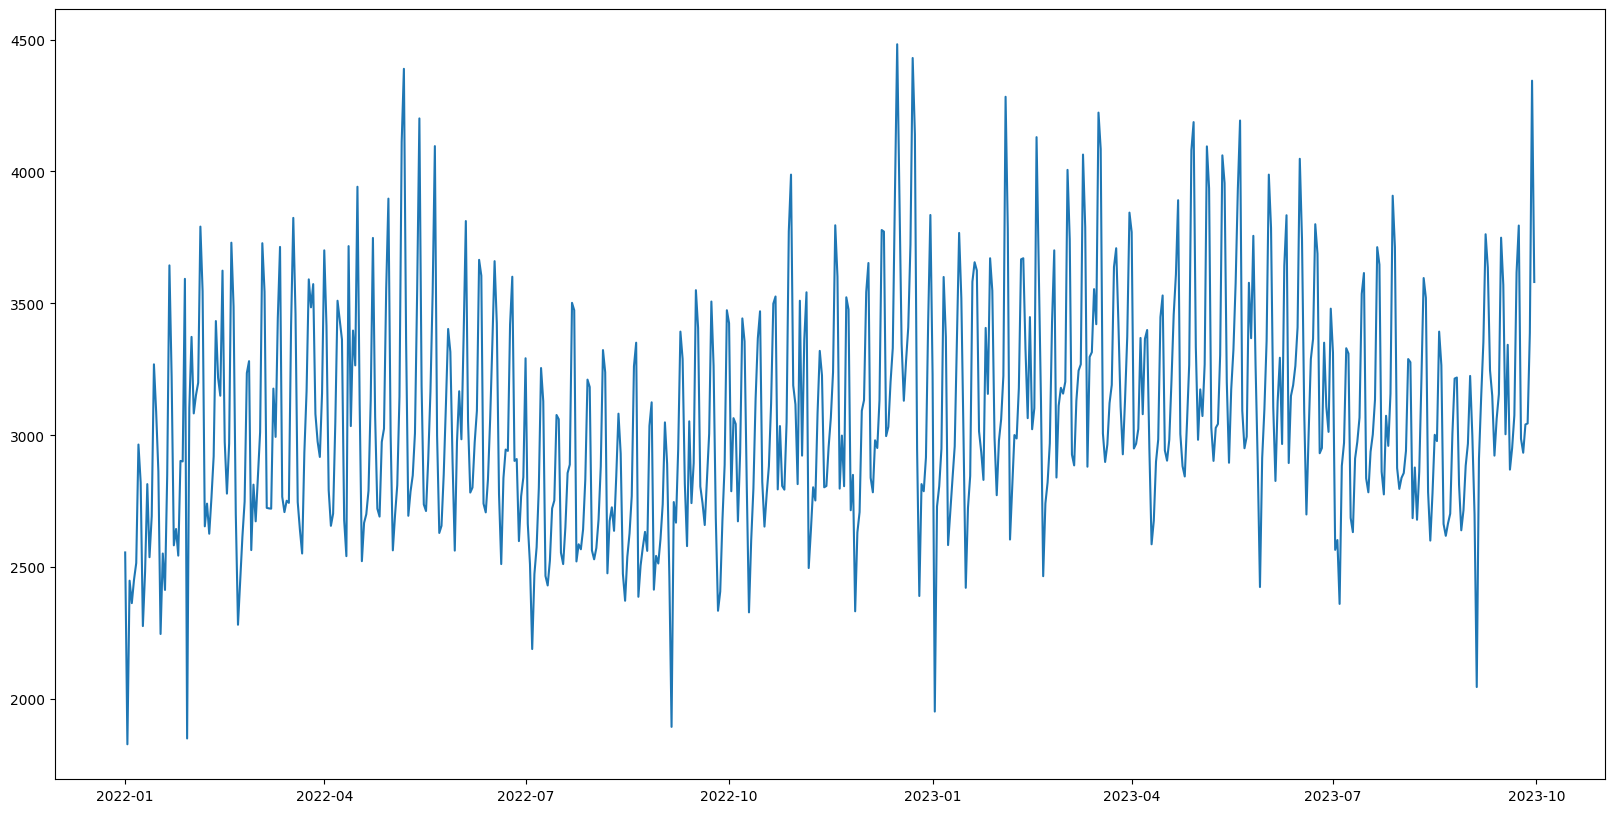

In [19]:
plt.figure(figsize=(20,10))
plt.plot(result[result['PULocationID']==14]['pickup_date'], result[result['PULocationID']==14]['count'])

In [22]:
# Check if there are any time periods that have NaN values for all locations


pivoted_df = result_with_na.pivot(index='pickup_date', columns='PULocationID', values='count')

# Find dates where all locations have NaN values
common_na_dates = pivoted_df[pivoted_df.isna().all(axis=1)]

# Get the start and end date of the common NA period
start_date = common_na_dates.index.min()
end_date = common_na_dates.index.max()

print("Common NA period for all locations:", start_date, "to", end_date)

Common NA period for all locations: NaT to NaT


In [21]:
result.head()

,PULocationID,pickup_date,count
0,1,2022-01-01,0
1,1,2022-01-02,0
2,1,2022-01-03,0
3,1,2022-01-04,0
4,1,2022-01-05,0
